### imgtofmri: predicting group-average fMRI responses to visual stimuli

In this notebook we introduce **imgtofmri**, a python package that predicts group-average fMRI responses to individual visual frames. We are publicly releasing this package to aid research investigations into how brain responses are driven from individual frames of movies. 


<!-- ###### (Process memory): -->
Neuroscience research has long investigated how humans are able to adeptly process continuous streams of immense perceptual data. Previous research focused on models of working memory that drew analogies from computer systems and described retrieval of memory from 'memory stores', such as those from a harddrive, where past information was thought to be integrated with present input through access to this working memory 'buffer' [[Baddeley 2012](https://doi.org/10.1146/annurev-psych-120710-100422)]. These theories, however, rely on several distinct memory components (mimicking a CPU, RAM, etc.) that have not been identified in the brain, and in fact, the neural regions often identified as the working memory 'buffers' are the same circuits that perform actual perceptual processing [[Buchsbaum, D'Esposito 2008](https://doi.org/10.1162/jocn.2008.20501)]. As a result of these challenges, more recent theories such as [[Hasson et al. 2015](http://dx.doi.org/10.1016/j.tics.2015.04.006)] postulate that the processing of current input should not be considered separate from working memory traces of past information. Instead, the 'hierarchical process memory' framework posits that a brain's response to current input is dependent not only on that sensory input but also on past input, with different sensory regions operating over distinct timescales. These varying timescales, defined empirically through fMRI and ECoG experiments with scrambled perceptual input at varying scales (e.g. shuffling phonemes, words, sentences, paragraphs, etc), explain how lower order sensory regions have shorter temporal receptive windows (TRW) on the order of milliseconds (e.g. to process phonemes), wheras higher order regions have TRWs on the order of seconds to minutes (e.g. to process a long sentence or paragraph) [[Honey, Christopher 2012](https://doi.org/10.1016/j.neuron.2012.08.011)]. In this manner, process memory provides a framework for describing how the brain continuously integrates present perceptual data with recent contextual information over varying timescales. 
<!-- Futhermore, this frame provides a foundation for describing how humans are able to use memories of , or schemas,  -->


<!-- ###### (Event boundary background): -->
This hierarchical process memory framework also extends well to the event segmentation literature, which uses the framework as a foundation for describing how humans use learned contexts and schemas to segment a constant stream of perceptual input into discrete events of varying timescales [[Zacks, Tversky 2001](http://dx.doi.org/10.1037//0033-2909.127.1.3); [Baldassano et al. 2017](https://doi.org/10.1016/j.neuron.2017.06.041)]. Research in this area has shown that these discrete events can be identified from cortical activity patterns and that the timescales of these events varies along a cortical hierarchy, with higher-order brain regions such as the posterior medial cortex showing longer timescales for events than sensory or early-visual regions [[Baldassano et al. 2017](https://doi.org/10.1016/j.neuron.2017.06.041)]. Movies are commonly used for studying this type of naturalistic perception within an fMRI scanner, and a result, research has focused on decoding semantic content from fMRI timecourse responses to natural movies [[Huth et al. 2016](https://doi.org/10.3389/fnsys.2016.00081)] (worth mention of study decoding what movie someone is watching based on HMM fit to events?). However, many questions remain about the timescale of events in these various brain regions, and about the extent to which these timescales can be predicted.

<!-- or predicting which movie someone is watching by just looking at their sequence of voxel-wise event boundaries, when fit to a machine learning model such as a hidden markov model -->


<!-- % have to motivate why f-f predictions are interesting to study -- this is a way to think ab movie responses and tease out current vs. past stimulus. -->
Furthermore, given that neural circuits process both current perceptual information as well as past information, we would like to know what activity, at a given point of time, can be predicted solely based on current perceptual input. If we can better model cortical responses to current stimulus, disentangled from recent or past stimuli, we might better focus our attention to how cortical circuits integrate recent stimulus to process the present, separate from any specific present stimulus. Thus, if we could predict visuocortical responses to single frames of a movie, we could compare this expected stimulus-driven fMRI response to responses from humans actually watching that movie, and then analyze how much of their neural activity can be explained purely based on semantic and visual features of the current stimulus. In this manner, we hope our model can be used to tease apart neural responses to current input from neural responses to previous stimulus or context. 

<!-- - (more on modeling/prediction of events? -- maybe [[Reynolds 2010](https://doi.org/10.1080/15326900701399913)], [[Shin, Dubrow 2020](https://doi.org/10.1111/tops.12505)])

- (anything on animacy/object | big/small | many/few in visual processing hierarchy?) -->


<!-- ###### (DNNs as feature extractors for neural prediction): -->

In recent years, artificial deep neural networks (DNNs) have shown promise in predicting cortical responses in the human visual cortex when trained on real world categorization tasks [[Cichy et al. 2016](https://doi.org/10.1038/srep27755)]. These neural networks learn to extract features (e.g. shapes, textures, eyes) from naturalistic visual data that allow them to accurately classify objects, animals, and scenes in the images they process [[Olah et al. 2017](https://distill.pub/2017/feature-visualization/)]. These networks can also be used to extract predominant features from input that can then be used to predict brain responses along a cortical processing hierarchy, despite these networks never being trained with neural data [[Eickenberg et al. 2017](https://doi.org/10.1016/j.neuroimage.2016.10.001)]. Research has also shown that the hierarchy of layers in a trained DNN can predict along a hierarchy of processing in the brain, where deeper, or higher, layers in a DNN best predict higher levels of cortical processing [[Kell et al. 2018](https://doi.org/10.1016/j.neuron.2018.03.044), [Schrimpf et al. 2020](https://doi.org/10.1101/407007)]. Using DNNs for feature extraction and brain prediction has also been shown with other modalities, such as audio and language data [cite Huth] as well as  cross-modal audiovisual data [[Khosla et al. 2021](https://doi.org/10.1126/sciadv.abe7547)]. Some models, such as some developed by [[Khosla et al. 2021](https://doi.org/10.1126/sciadv.abe7547)], use recurrences in their networks to better model the temporal integration of current information with recent information. Instead, we are not as interested here in modeling the temporal integration of present and past stimuli, but instead are interested in modeling only the responses to present input, so that we may better focus on the event dynamics in neural responses disentangled from specific stimuli. As a result, we focus on predicting neural responses to single image frames, and then use the resulting event dynamics from our frame-by-frame predicted brains as comparison to temporally integrated human responses to the same films. We also present a comparison of our model with a baseline luminance model, which describes the changes in lighting in image frames of the movie, to understand how the event dynamics of our predicted brains compares to event dynamics suggested purely based on changes in luminance throughout the movie.


<!-- ###### (Model introduction): -->
In this notebook, we present imgtofmri, a python package and model that allows for quick predictions of group-averaged cortical responses to visual stimuli. As we outline in this notebook, we can use this model to predict brain responses to unseen images, or to more continuous, naturalistic stimuli such as movies. With an unseen dataset, twinset [[Mohsenzadeh, 2019](https://doi.org/10.3390/vision3010008)], we demonstrate how well our model's predicted fMRI responses compare to real fMRI responses at a group level, across various categories of visual stimulus, and also within subjects. After validating our model with this novel dataset, we move to predicting fMRI responses to Pixar's Partly Cloudy [cite movie?] and compare our model's frame-by-frame predictions to that of human subjects watching the same movie [[Richardson, 2018](https://doi.org/10.1038/s41467-018-03399-2)], showing that much of the event segmentation observed in the human brain can be explained by mid-level semantic information in the visual stimulus.


For more information on the training of our dataset using the open source BOLD5000 dataset and pretrained pytorch ResNet-18 model as our CNN, we include a folder on model training for reproducibility and package extension.

<center>
<img src="img/overview.png" alt="drawing" width="500" align="center"/>
</center>

In this notebook, we overview use of the python and command line package, imgtofmri, as well as demonstrate the model's extension and prediction power to novel datasets not used in the training of the model.

## Using imgtofmri on an unseen dataset
We first show how we can use imgtofmri to predict fMRI responses to out-of-dataset images. We perform this on the [Twinset Dataset](http://twinsetfusion.csail.mit.edu/) compiled by Mohsenzadeh et al. This dataset is comprised of fMRI data for 33 adults viewing 156 images. These images are split across 5 categories:

<center>
<img src="img/twinset_cropped.png" alt="drawing" width="300" align="center"/>
</center>

We proceed by:
<ol>
<li>Downloading this dataset</li>
<li>Pushing it through our model with the imgtofmri.predict() function</li>
<li>Analyzing performance:</li>
    <ol>
<li>With the whole group</li>
<li>Within categories</li>
<li>Within subjects</li>
    </ol>
</ol>

In [165]:
%load_ext autoreload
%autoreload 2
import imgtofmri

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
input_dir = 'input_images/156ImageStimuliSet/'
output_dir = 'output_testing_aperture/'

# Options for ROIs are: EarlyVis, OPA, LOC, PPA, RSC
# We use LOC, PPA, and RSC for our tutorial, as they performed strongest above chance
rois = ['LOC', 'PPA', 'RSC']

In [76]:
url = 'http://wednesday.csail.mit.edu/fusion_rep/stimulus/156ImageStimuliSet.zip'
imgtofmri.load_imgs(url)

Downloaded and extracted: 156ImageStimuliSet.zip


In [108]:
imgtofmri.predict(input_dir, output_dir, rois)

Averaging MNI brains: 100%|██████████| 157/157 [00:13<00:00, 11.85it/s]


### Twinset Analyses

In [109]:
imgtofmri.twinset_generate_group_correlations(output_dir)

Generating correlations with group-averaged brains: 100%|██████████| 156/156 [07:05<00:00,  2.73s/it]


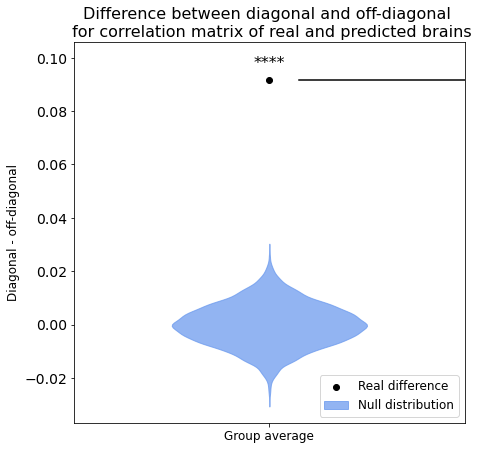

In [167]:
imgtofmri.twinset_random_group_permutations(n_shuffle=10000)

In [111]:
imgtofmri.twinset_generate_category_correlations(output_dir)

Generating correlations for 'faces': 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


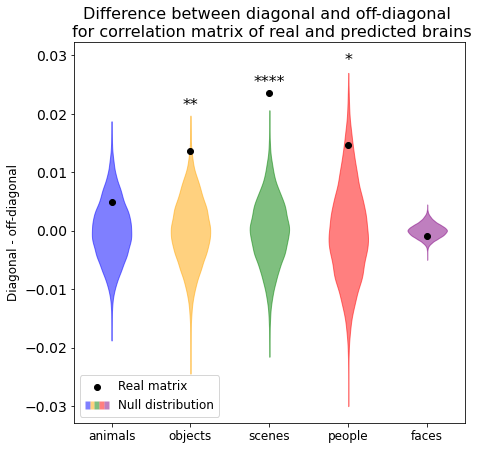

In [112]:
imgtofmri.twinset_random_category_permutations(n_shuffle=10000)

In [41]:
imgtofmri.twinset_generate_participant_correlations(output_dir)

Generating correlations per participant: 100%|██████████| 2340/2340 [2:43:12<00:00,  4.19s/it]  


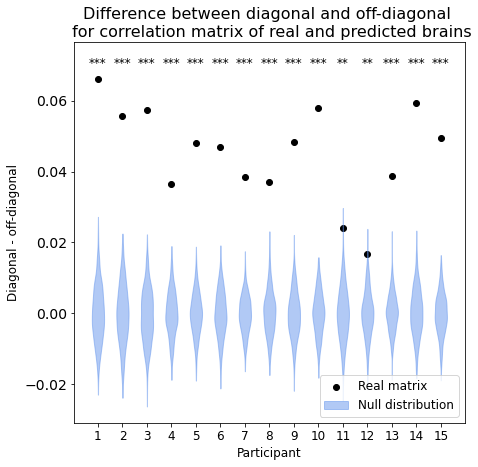

In [42]:
imgtofmri.twinset_random_participant_permutations(n_shuffle=1000)

### Generalizing image prediction to movies (Partly Cloudy)

In [2]:
%load_ext autoreload
%autoreload 2
from imgtofmri import *
import utils

220405-00:20:42,102 nipype.utils WARNING:
	 A newer version (1.7.0) of nipy/nipype is available. You are using 1.5.1


In [96]:
utils.extractImages('../PartlyCloudy.m4v', 'pc_test/')

Saving movie frames: 691it [04:09,  2.77it/s]                         


In [98]:
mkdir output_partly_cloudy

In [3]:
input_dir = 'pc_test'
output_dir = 'output_partly_cloudy'
overlap = get_subj_overlap()

In [106]:
imgtofmri.predict(input_dir, output_dir)

Averaging MNI brains: 100%|██████████| 691/691 [00:57<00:00, 12.07it/s]


In [71]:
pred = nib.load('pred_processed.nii.gz').get_fdata()

### comparing to old frames

In [79]:
input_dir = '../partly_cloudy'
output_dir = 'old_frames_partly_cloudy'
# imgtofmri.predict(input_dir, output_dir)

In [80]:
# load predicted brains
from natsort import natsorted

init_subj_nib = nib.load(glob.glob(f'{output_dir}/*.nii.gz')[0])
brain_shape = init_subj_nib.shape
n_frames = len(glob.glob(f'{output_dir}/*.nii.gz'))
pred_brain = np.zeros((brain_shape[0],
                       brain_shape[1],
                       brain_shape[2],
                       n_frames))

for i, brain in enumerate(natsorted(glob.glob(f'{output_dir}/*'))):
    pred_brain[overlap,i] = nib.load(brain).get_fdata()[overlap]
    

In [83]:
# convolve with hrf and downsample
pred_brain = utils.regressor_to_TR(pred_brain, nTR=168)

Downsampling: 100%|██████████| 91/91 [00:13<00:00,  6.83it/s]


In [84]:
# remove average activity
pred_brain[overlap] = utils.remove_average_activity(pred_brain[overlap])

In [85]:
# remove discrete cosine transform
pred_brain[overlap] = utils.remove_DCT(pred_brain[overlap])

In [86]:
nib.save(nib.Nifti1Image(pred_brain, affine=init_subj_nib.affine),
                         f'old_frames_new_pred_brain.nii.gz')

In [87]:
pred_brain = pred_brain[:,:,:,2:-8]

In [88]:
old_frames_new_pred = pred_brain

In [90]:
old_frames_new_pred = np.corrcoef(old_frames_new_pred[overlap].T)

In [93]:
new_frames_new_pred = pred

In [ ]:
# older stuff unchanged

In [94]:
true_dir = "../pc_true/preprocessed_data"
output_dir = "output/"
input_dir = "../partly_cloudy/"
overlap = get_subj_overlap()

In [123]:
# Loading Luminance model as comparison
new_frames_lum = get_luminance(input_dir='./pc_test')
new_frames_lum = np.corrcoef(new_frames_lum)

Downsampling: 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


In [96]:
# Loading predicted brains
pred_old = nib.load(f'old/output_old/pred_avg_ra_dcto.nii.gz').get_fdata()
pred_old = pred_old[:,:,:,2:-8]
pred_old = np.corrcoef(pred_old[overlap].T)
# plt.imshow(pred)

In [97]:
old_frames_old_pred = pred_old

In [128]:
# Loading Luminance model as comparison
old_frames_lum = get_luminance(input_dir='../partly_cloudy')
old_frames_lum = np.corrcoef(old_frames_lum)

Downsampling: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


In [99]:
# Loading True brains
true = nib.load(f'{true_dir}/avg_r_ro_m_s_z_ra_dcto.nii.gz').get_fdata()
true = true[:,:,:,10:]
true = np.corrcoef(true[overlap].T)
# plt.imshow(true)

Text(0.5, 0.98, 'Correlation matrices for Partly Cloudy')

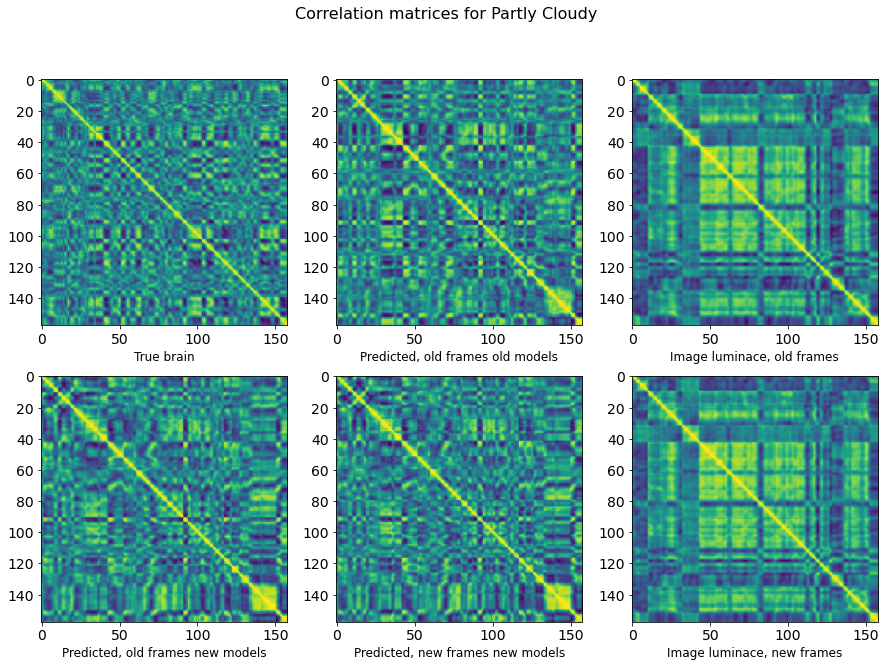

In [134]:
# Correlation matrices
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes[0,0].imshow(true)
axes[0,1].imshow(old_frames_old_pred)
axes[0,2].imshow(old_frames_lum)
# axes[1,2].axis('off')
axes[1,0].imshow(old_frames_new_pred)
axes[1,1].imshow(new_frames_new_pred)
axes[1,2].imshow(new_frames_lum)
axes[0,0].set_xlabel('True brain', fontsize=12)
axes[0,1].set_xlabel('Predicted, old frames old models', fontsize=12)
axes[0,2].set_xlabel('Image luminace, old frames', fontsize=12)
axes[1,0].set_xlabel('Predicted, old frames new models', fontsize=12)
axes[1,1].set_xlabel('Predicted, new frames new models', fontsize=12)
axes[1,2].set_xlabel('Image luminace, new frames', fontsize=12)
fig.suptitle('Correlation matrices for Partly Cloudy', fontsize=16)

### Comparing performance between Predicted brains + Luminance model

In [135]:
new_corr = generate_bootstrapped_correlations(true, new_frames_new_pred, new_frames_lum, TR_band=None)

Generating and loading bootstraps: 100%|██████████| 100/100 [06:10<00:00,  3.71s/it]


In [137]:
old_corr = generate_bootstrapped_correlations(true, old_frames_old_pred, old_frames_lum, TR_band=None)

Generating and loading bootstraps: 100%|██████████| 100/100 [05:52<00:00,  3.53s/it]


In [138]:
corr = new_corr

#### On the full movie timecourse

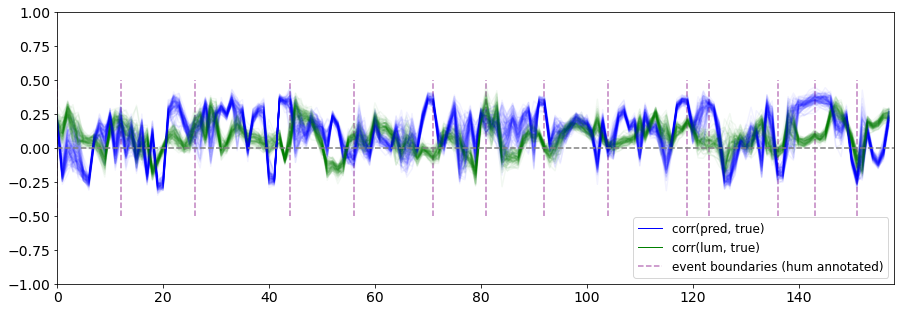

In [139]:
pc_pred_lum_timecourse(corr)

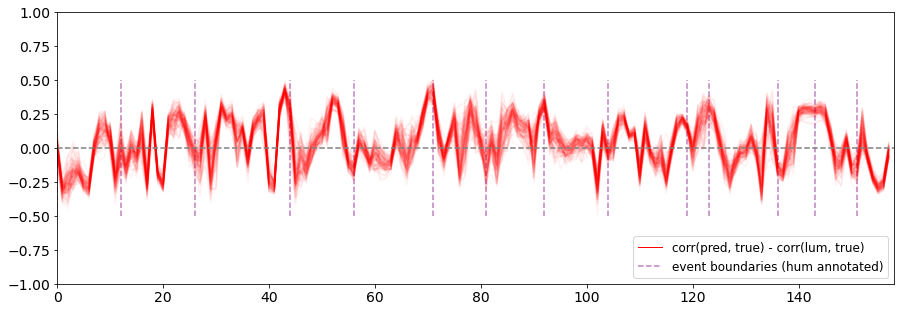

In [140]:
pc_difference_timecourse(corr)

#### Boundary triggered averages with bootstraps

In [141]:
bound_averages = generate_boundary_triggered_averages(corr)

Generating bootstrapped boundaries: 100%|██████████| 1000/1000 [00:10<00:00, 96.98it/s]


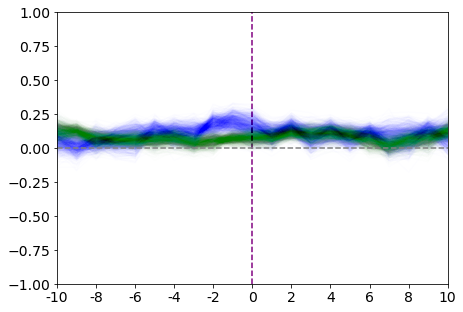

In [142]:
pc_bootstrapped_pred_lum(bound_averages)

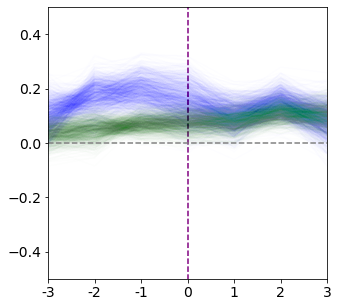

In [143]:
pc_bootstrapped_pred_lum_3TRs(bound_averages)

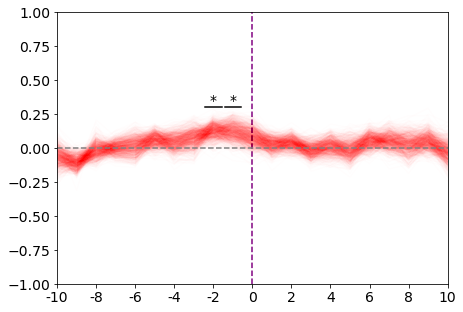

In [144]:
pc_bootstrapped_difference(bound_averages)

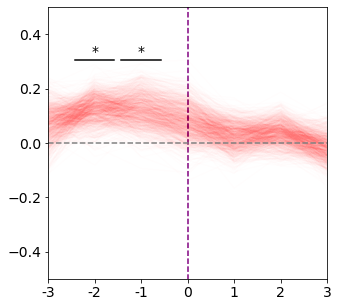

In [145]:
pc_bootstrapped_difference_3TRs(bound_averages)

## ±10 TRs

In [157]:
corr = generate_bootstrapped_correlations(true, pred, lum, TR_band=10)

Generating and loading bootstraps: 100%|██████████| 100/100 [05:34<00:00,  3.34s/it]


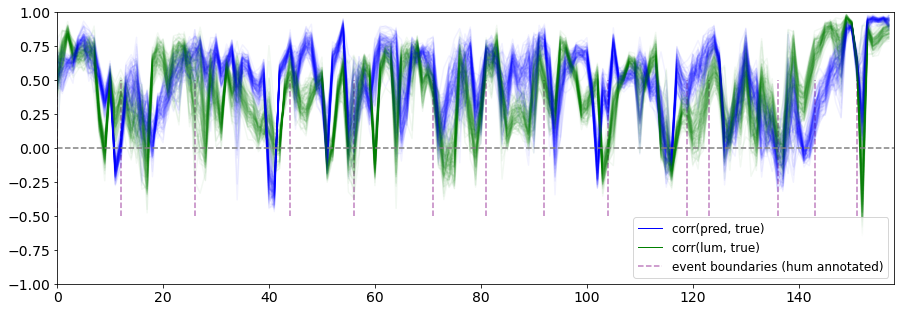

In [158]:
pc_pred_lum_timecourse(corr)

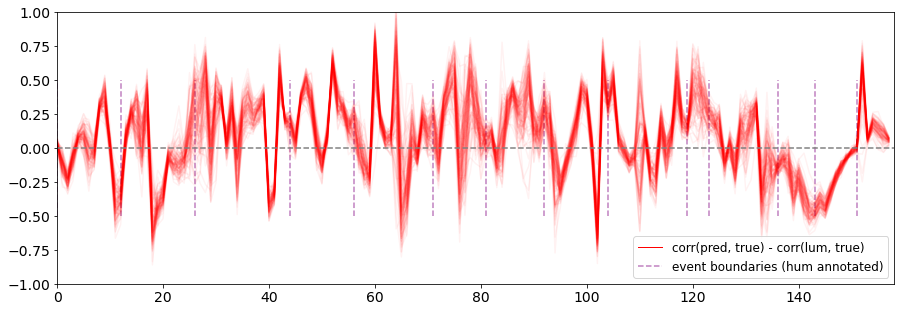

In [159]:
pc_difference_timecourse(corr)

## Boundary triggered averages

In [160]:
bound_averages = generate_boundary_triggered_averages(corr)

Generating bootstrapped boundaries: 100%|██████████| 1000/1000 [00:10<00:00, 92.22it/s]


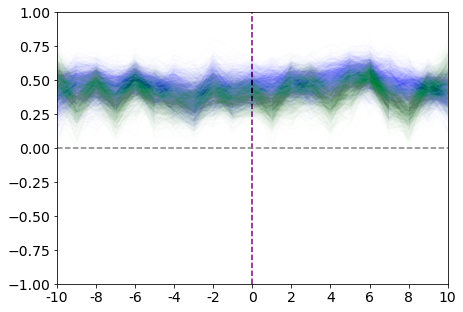

In [161]:
pc_bootstrapped_pred_lum(bound_averages)

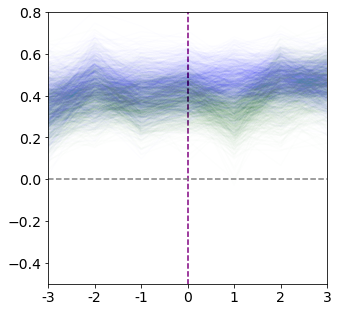

In [162]:
pc_bootstrapped_pred_lum_3TRs(bound_averages, y_max=0.8)

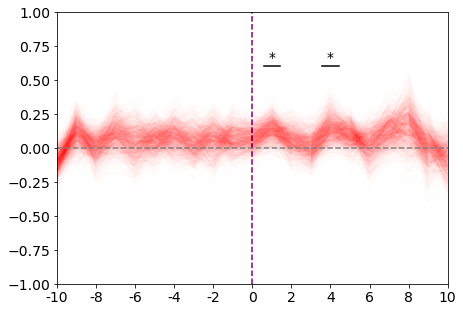

In [163]:
pc_bootstrapped_difference(bound_averages)

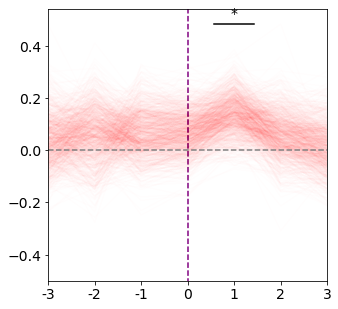

In [164]:
pc_bootstrapped_difference_3TRs(bound_averages)

In [174]:
bound_averages[0,10,:].mean() - bound_averages[1,10,:].mean()

0.06373751474987221

In [177]:
diffs = bound_averages[0,:,:] - bound_averages[1,:,:]
print(num_below_zero(diffs)[8:12])

[0.42357642 0.03096903 0.16483516 0.23276723]


### bandwidth testing

In [146]:
pred = new_frames_new_pred
lum = new_frames_lum

In [147]:
nTR = true.shape[0]
corr = np.zeros((2, nTR//2, nTR)) # pred,lum x band_width x corr(each_row) 
for b in range (1,nTR//2):
    upt = ~np.triu(np.ones(nTR).astype(bool), b + 1) # upper triangle of 0s
    lot = np.triu(np.ones(nTR).astype(bool), -b) # lower triangle of 0s
    band = upt & lot
    notdiag = 1-np.diag(np.ones(158)).astype(bool)
    band = band & notdiag
    band = band.astype(bool)

    for i in range(1, nTR-1):
        corr[0,b,i] = stats.pearsonr(pred[i][band[i]], true[i][band[i]])[0]
        corr[1,b,i] = stats.pearsonr(lum[i][band[i]], true[i][band[i]])[0]

mean_corr = np.zeros((2,nTR//2))
for b in range(1, nTR//2):
    mean_corr[0,b] = np.mean(corr[0,b,:])
    mean_corr[1,b] = np.mean(corr[1,b,:])

Text(0.5, 1.0, 'mean correlation of row x row corrs from TRxTR matrices')

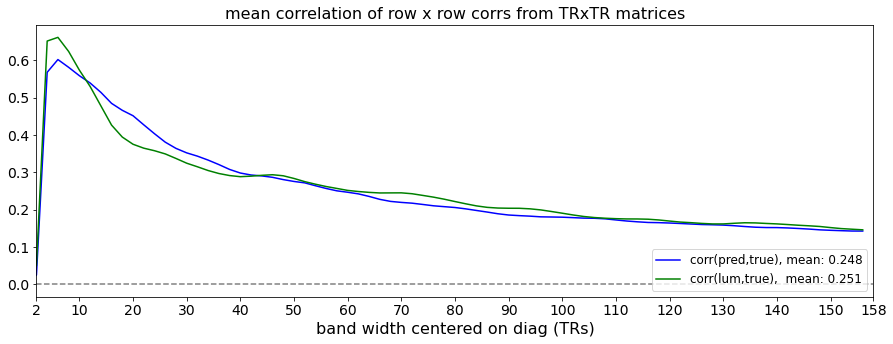

In [148]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15, 5))
plt.tick_params(axis='x', top=False, labeltop=False)
plt.plot(mean_corr[0], color='blue', label=f'corr(pred,true), mean: {np.mean(corr[0]):.3f}')
plt.plot(mean_corr[1], color='green', label=f'corr(lum,true),  mean: {np.mean(corr[1]):.3f}')
axes = plt.gca()
# axes.set_ylim([-1,1])
axes.set_xlim([1,nTR//2])
# axes.set_ylabel("mean correlation (r)")
axes.set_xlabel("band width centered on diag (TRs)")

ticks = [i for i in np.concatenate(([2], np.arange(10,  nTR, step=10), [nTR]))/2]
ticklabels = [f'{i:.0f}' for i in np.concatenate(([2], np.arange(10,  nTR, step=10), [nTR]))]
axes.set_xticks(ticks)
axes.set_xticklabels(ticklabels)

plt.axhline(0, 0, nTR, linestyle='dashed', color='grey')
plt.legend(fontsize='large', loc='lower right')
plt.title("mean correlation of row x row corrs from TRxTR matrices")

In [149]:
bwidth_testing = np.load("bootstrap_bandwidth_testing_50x10_apr4_newlum_newpred.npy", allow_pickle=True)

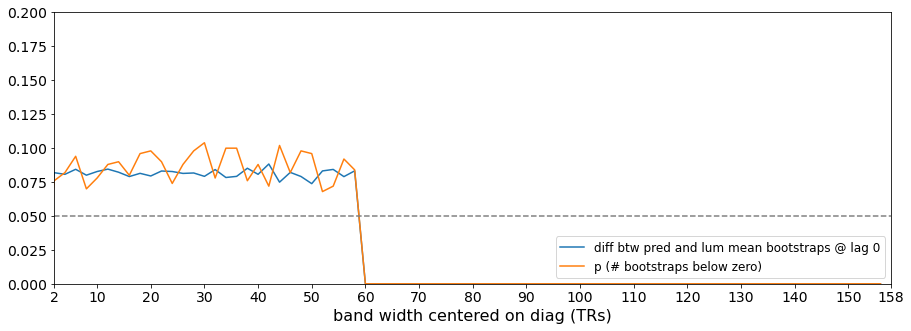

In [151]:
plt.figure(figsize=(15, 5))
plt.tick_params(axis='x', top=False, labeltop=False)
plt.plot(bwidth_testing[0], label='diff btw pred and lum mean bootstraps @ lag 0')
plt.plot(bwidth_testing[1], label='p (# bootstraps below zero)')
axes = plt.gca()
axes.set_ylim([0,.2])
axes.set_xlim([1,nTR//2])
axes.set_xlabel("band width centered on diag (TRs)")

ticks = [i for i in np.concatenate(([2], np.arange(10,  nTR, step=10), [nTR]))/2]
ticklabels = [f'{i:.0f}' for i in np.concatenate(([2], np.arange(10,  nTR, step=10), [nTR]))]
axes.set_xticks(ticks)
axes.set_xticklabels(ticklabels)

plt.axhline(0.05, 0, nTR, linestyle='dashed', color='grey')
plt.legend(fontsize='large', loc='lower right')

In [156]:
bwidth_testing[1]

array([0.        , 0.0758483 , 0.08183633, 0.09381238, 0.06986028,
       0.07784431, 0.08782435, 0.08982036, 0.07984032, 0.09580838,
       0.09780439, 0.08982036, 0.0738523 , 0.08782435, 0.09780439,
       0.10379242, 0.07784431, 0.0998004 , 0.0998004 , 0.0758483 ,
       0.08782435, 0.07185629, 0.10179641, 0.08183633, 0.09780439,
       0.09580838, 0.06786427, 0.07185629, 0.09181637, 0.08383234,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [271]:
# TODO: understand this??
print(mean_corr[0,:5])
print(mean_corr[1,:5])

[0.         0.02531646 0.56811978 0.6022079  0.58139517]
[0.         0.         0.55609253 0.54042465 0.49790825]


### Mean diff in corr at lag 0 from bootstrapped boundary triggered averages with varied bandwidth

In [77]:
nTR = true.shape[0]
corr = np.zeros((2, nTR//2, nTR)) # pred,lum x band_width x corr(each_row) 

In [138]:
bound_averages.shape

(2, 21, 1000)

In [139]:
diffs = bound_averages[0,:,:] - bound_averages[1,:,:]
print(bound_averages[0,10,:].mean() - bound_averages[1,10,:].mean())

0.0837359437011153


In [155]:
diffs = bound_averages[0,:,:] - bound_averages[1,:,:]
print(bound_averages[0,10,:].mean() - bound_averages[1,10,:].mean())

0.07108476544847514


In [159]:
diffs.max()
num_below_zero(diffs)

array([0.48514851, 0.94059406, 0.57425743, 0.62376238, 0.16831683,
       0.07920792, 0.25742574, 0.16831683, 0.15841584, 0.01980198,
       0.08910891, 0.13861386, 0.2970297 , 0.71287129, 0.54455446,
       0.68316832, 0.26732673, 0.18811881, 0.69306931, 0.11881188,
       0.22772277])

In [78]:
bwidth_testing = np.zeros((2, nTR//2))
for b in range(1,nTR//2):
    if b % 5 == 0: print(f"Bandwidth: {b}")
    corr = generate_bootstrapped_correlations(true, pred, lum, TR_band=nTR, num_bootstraps=50)
    bound_averages = generate_boundary_triggered_averages(corr)
    diffs = bound_averages[0,:,:] - bound_averages[1,:,:]
    bwidth_testing[0,b] = bound_averages[0,10,:].mean() - bound_averages[1,10,:].mean()
    bwidth_testing[1,b] = num_boundary_below_zero(diffs)[10]

Generating bootstrapped boundaries: 100%|██████████| 500/500 [00:05<00:00, 98.04it/s] 


NameError: name 'num_below_zero' is not defined

In [ ]:
np.save("bootstrap_bandwidth_testing_50x10_apr4_newlum_newpred.npy", bwidth_testing)
# bwidth_testing = np.load("bootstrap_bandwidth_testing_50x10.npy", allow_pickle=True)

In [149]:
bwidth_testing = np.load("bootstrap_bandwidth_testing_50x10_apr4_newlum_newpred.npy", allow_pickle=True)

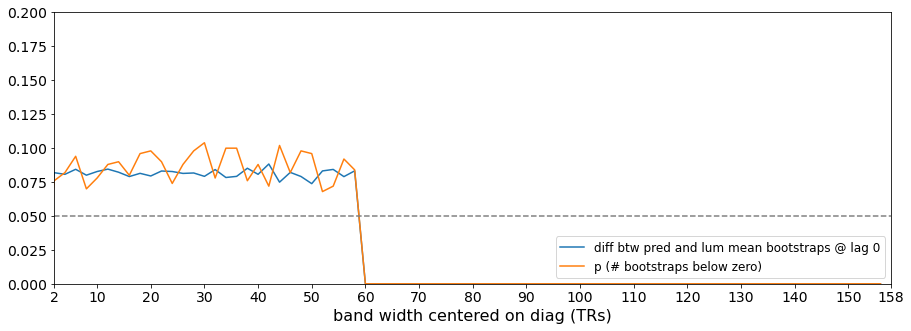

In [151]:
plt.figure(figsize=(15, 5))
plt.tick_params(axis='x', top=False, labeltop=False)
plt.plot(bwidth_testing[0], label='diff btw pred and lum mean bootstraps @ lag 0')
plt.plot(bwidth_testing[1], label='p (# bootstraps below zero)')
# plt.plot(mean_corr[0], color='blue', label=f'corr(pred,true), mean: {np.mean(corr[0]):.3f}')
# plt.plot(mean_corr[1], color='green', label=f'corr(lum,true),  mean: {np.mean(corr[1]):.3f}')
axes = plt.gca()
axes.set_ylim([0,.2])
axes.set_xlim([1,nTR//2])
# axes.set_ylabel("mean correlation (r)")
axes.set_xlabel("band width centered on diag (TRs)")

ticks = [i for i in np.concatenate(([2], np.arange(10,  nTR, step=10), [nTR]))/2]
ticklabels = [f'{i:.0f}' for i in np.concatenate(([2], np.arange(10,  nTR, step=10), [nTR]))]
axes.set_xticks(ticks)
axes.set_xticklabels(ticklabels)

plt.axhline(0.05, 0, nTR, linestyle='dashed', color='grey')
plt.legend(fontsize='large', loc='lower right')
# plt.title("mean correlation of row x row corrs from TRxTR matrices")

In [154]:
bwidth_testing

array([[0.        , 0.07945847, 0.06348881, 0.06112204, 0.07080591,
        0.07088384, 0.08647137, 0.07300087, 0.07345508, 0.06243974,
        0.0871685 , 0.07946175, 0.0714234 , 0.06405961, 0.07684834,
        0.07328313, 0.07239477, 0.07072836, 0.07992342, 0.07475752,
        0.06560567, 0.08011072, 0.07614242, 0.07093257, 0.06390238,
        0.06881017, 0.0780156 , 0.06967829, 0.06987004, 0.06393592,
        0.07634868, 0.07038174, 0.07267021, 0.07653311, 0.07836448,
        0.0701291 , 0.06142477, 0.07828269, 0.07836421, 0.07413744,
        0.0742171 , 0.08203287, 0.07620066, 0.08576999, 0.08209251,
        0.07143103, 0.0689426 , 0.0766482 , 0.07364399, 0.07571345,
        0.08205459, 0.0646138 , 0.0728348 , 0.06970536, 0.07763243,
        0.07270388, 0.0755572 , 0.07697578, 0.06993001, 0.08431671,
        0.07428636, 0.08127116, 0.07602747, 0.07071903, 0.06664045,
        0.08475186, 0.07207808, 0.0790205 , 0.07535618, 0.07841661,
        0.07044056, 0.07590813, 0.07562947, 0.07

#### Notes
- rewrite check for file suffix to be fn with list from beginning?

## Appendix

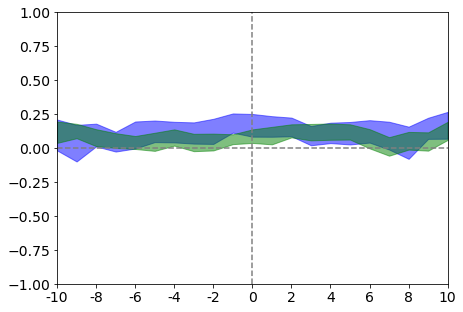

In [38]:
imgtofmri.pc_bootstrapped_pred_lum_conf_intervals(bound_averages)

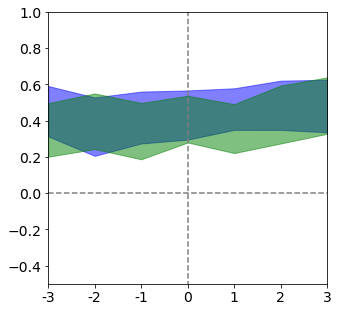

In [33]:
imgtofmri.pc_bootstrapped_pred_lum_3TRs_conf_intervals(bound_averages)

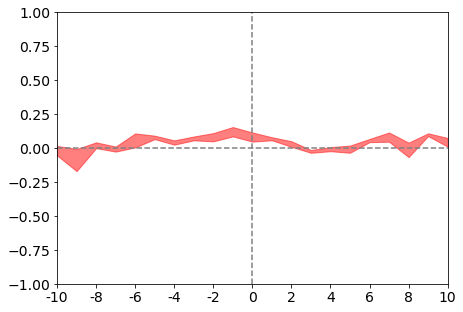

In [45]:
imgtofmri.pc_bootstrapped_difference_conf_intervals(bound_averages)

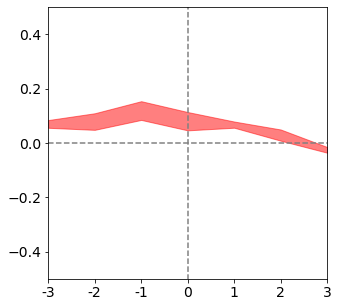

In [46]:
imgtofmri.pc_bootstrapped_difference_3TRs_conf_intervals(bound_averages)

In [105]:
%env PATH=/Users/maxwellbennett/abin:/Users/maxwellbennett/opt/anaconda3/envs/venv/bin:/Users/maxwellbennett/opt/anaconda3/condabin:/usr/local/sbin:/Users/maxwellbennett/google-cloud-sdk/bin:/usr/local/fsl/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/go/bin:/opt/X11/bin:/Library/Apple/usr/bin:/Library/Frameworks/Mono.framework/Versions/Current/Commands

env: PATH=/Users/maxwellbennett/abin:/Users/maxwellbennett/opt/anaconda3/envs/venv/bin:/Users/maxwellbennett/opt/anaconda3/condabin:/usr/local/sbin:/Users/maxwellbennett/google-cloud-sdk/bin:/usr/local/fsl/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/go/bin:/opt/X11/bin:/Library/Apple/usr/bin:/Library/Frameworks/Mono.framework/Versions/Current/Commands


In [ ]:
# Loading new predicted brains

In [6]:
# load predicted brains
from natsort import natsorted

init_subj_nib = nib.load(glob.glob(f'{output_dir}/*.nii.gz')[0])
brain_shape = init_subj_nib.shape
n_frames = len(glob.glob(f'{output_dir}/*.nii.gz'))
pred_brain = np.zeros((brain_shape[0],
                       brain_shape[1],
                       brain_shape[2],
                       n_frames))

for i, brain in enumerate(natsorted(glob.glob(f'{output_dir}/*'))):
    pred_brain[overlap,i] = nib.load(brain).get_fdata()[overlap]
    

In [ ]:
nib.save(nib.Nifti1Image(pred_brain, affine=init_subj_nib.affine),
                         f'pred_brain.nii.gz')

In [5]:
# convolve with hrf and downsamples
pred_brain = utils.regressor_to_TR(pred_brain, nTR=168)

Downsampling: 100%|██████████| 91/91 [00:13<00:00,  6.79it/s]


In [6]:
# remove average activity
pred_brain[overlap] = utils.remove_average_activity(pred_brain[overlap])

In [10]:
pred_brain[overlap] = utils.remove_DCT(pred_brain[overlap])

In [206]:
nib.save(nib.Nifti1Image(pred_brain, affine=init_subj_nib.affine),
                         f'pred_processed.nii.gz')